# part 1

In [1]:
import pandas as pd
import dask.bag as db
import json
json_file = "dblp-ref-3.json"
#b = db.read_text(json_file).map(json.loads)
# print(b.take(4))
data = pd.read_json(json_file, lines=True)
data

,abstract,authors,n_citation,references,title,venue,year,id
0,AdaBoost algorithm based on Haar-like features...,"[Zheng Xu, Runbin Shi, Zhihao Sun, Yaqi Li, Yu...",0,"[0a11984c-ab6e-4b75-9291-e1b700c98d52, 1f4152a...",A Heterogeneous System for Real-Time Detection...,high performance computing and communications,2016,001eef4f-1d00-4ae6-8b4f-7e66344bbc6e
1,"In this paper, a kind of novel jigsaw EBG stru...","[Yufei Liang, Yan Zhang, Tao Dong, Shan-wei Lu]",0,[],A novel conformal jigsaw EBG structure design,international conference on conceptual structures,2016,002e0b7e-d62f-4140-b015-1fe29a9acbaa
2,This paper studies the problem of using an aut...,"[Xiaodong Ai, Keyou You, Shiji Song]",0,"[1862a08a-08c6-4ab1-a214-8932bbd0d2d9, 7bcea2f...",A source-seeking strategy for an autonomous un...,"international conference on control, automatio...",2016,00352759-f0a7-4678-82ae-fed68c700da6
3,NaN,"[Francine Berman, Vinton G. Cerf]",0,[],Social and ethical behavior in the internet of...,Communications of The ACM,2017,00f77fa9-ae49-4935-9166-2f5f9cdb3d6b
4,NaN,"[Leon A. Sakkal, Kyle Z. Rajkowski, Roger S. A...",50,"[4f4f200c-0764-4fef-9718-b8bccf303dba, aa699fb...",Prediction of consensus binding mode geometrie...,Journal of Computational Chemistry,2017,013ea675-bb58-42f8-a423-f5534546b2b1
...,...,...,...,...,...,...,...,...
79002,NaN,"[Hassan Charaf, Peter Ekler, Tamás Mészáros, I...",50,NaN,Mobile Platforms and Multi-Mobile Platform Dev...,Acta Cybernetica,2014,ff5ce050-ea8d-40e8-a25f-c629bed2ff9c
79003,NaN,"[Saul Blecker, Stuart D. Katz, Leora I. Horwit...",0,NaN,Comparison of Approaches for Heart Failure Cas...,,2016,ff5f5e4d-b650-496a-bfdd-91affb718488
79004,NaN,"[Dzmitry Bahdanau, Tom Bosc, Stanisław Jastrzę...",0,NaN,Learning to Compute Word Embeddings on the Fly,,2017,ff8fba62-4bf4-40cd-8555-46b8c64dddd7
79005,NaN,"[Kirsti Askedal, Leif Skiftenes Flak, Eirik Ab...",0,NaN,Reviewing Effects of ICT in Primary Healthcare...,,2017,ff90ffea-c94e-4ac5-a36a-05e1eccd6a76


In [2]:
data_csv = pd.read_csv("mappings_v10_ref_3.csv")
data_csv.columns = ['id', 'references']
data_csv

,id,references
0,001eef4f-1d00-4ae6-8b4f-7e66344bbc6e,0a11984c-ab6e-4b75-9291-e1b700c98d52
1,001eef4f-1d00-4ae6-8b4f-7e66344bbc6e,1f4152a3-481f-4adf-a29a-2193a3d4303c
2,001eef4f-1d00-4ae6-8b4f-7e66344bbc6e,3c2ddf0a-237b-4d17-8083-c90df5f3514b
3,001eef4f-1d00-4ae6-8b4f-7e66344bbc6e,522ce553-29ea-4e0b-9ad3-0ed4eb9de065
4,001eef4f-1d00-4ae6-8b4f-7e66344bbc6e,579e5f24-5b13-4e92-b255-0c46d066e306
...,...,...
602401,fe85a06b-fad0-4b8f-afa3-2a4fde69fe09,33d07685-d4bb-48f5-9d16-0aa36622488c
602402,fe85a06b-fad0-4b8f-afa3-2a4fde69fe09,45f066ed-71dc-470a-ac44-89d048ba7770
602403,fe85a06b-fad0-4b8f-afa3-2a4fde69fe09,5baedf66-fd44-400c-b17a-cbb11eeec1d9
602404,fe85a06b-fad0-4b8f-afa3-2a4fde69fe09,b2411c4f-68c5-4884-b4f6-ec06c6ea2a23


I'm using this option: treat papers as nodes and citation relationships as edges

I want to select the article that are widely used.
I choose treat papers as nodes, and citation relationships as edges. I select data for recent 6 years because it can show the network for recent researches. Also, select data posted in venue, I think the researches in venue will be more professional. Then, select n_citations >= 10, the more citation it has, the better article it is. 

Then, select number of reference > 10. A good article should has some reference. Also select number of reference below 20, to reduce computational cost.(I want to include references with more than 20, but my computer works very slow)

In [5]:
year_cond = data['year'] >= 2021- 6
venue_cond = data['venue'].str.len() > 0
n_cite_cond = data['n_citation'] >= 5
reference_cond = data['references'].str.len()>= 5

In [6]:
data[year_cond & venue_cond & n_cite_cond & reference_cond]

,abstract,authors,n_citation,references,title,venue,year,id
10,For stereoscopic optical see-through head-moun...,"[Long Qian, Alexander Winkler, Bernhard Fuerst...",50,"[076bca9b-b30c-4c2c-8148-3b9b5d9aa939, 6b5cf40...",Modeling Physical Structure as Additional Cons...,international symposium on mixed and augmented...,2016,01f02fae-97df-4207-a386-a1bc8ec0853b
29,For the multiterminal secret key agreement pro...,"[Chung Chan, Manuj Mukherjee, Navin Kashyap, Q...",50,"[19eb4d23-c01f-484a-ad86-0f1061622295, 205c230...",Secret Key Agreement under Discussion Rate Con...,arXiv: Information Theory,2017,0600c67e-71a1-4ed2-913f-e9db02370de4
39,This paper addresses the synchronization and s...,"[R. Sakthivel, M. Sathishkumar, B. Kaviarasan,...",50,"[13a1ecb2-e3c6-40f0-b7a7-a1fe8390e0a3, 1454d5f...",Synchronization and state estimation for stoch...,Neurocomputing,2017,08ed3a9e-75a9-4f91-b318-c24cf56eb6e7
48,Semantic image segmentation is a fundamental t...,"[Tong Shen, Guosheng Lin, Chunhua Shen, Ian D....",50,"[031bbeb0-4dc1-46f9-9984-109c3b3eefae, 153c501...",Learning Multi-level Region Consistency with D...,arXiv: Computer Vision and Pattern Recognition,2017,0a2562d0-f2af-47e1-a783-02aac8607c7b
67,NaN,"[Rafael A. Calvo, David N. Milne, M. Sazzad Hu...",50,"[0500ddbe-e274-477b-bb6b-54a7269e4577, 19d8e56...",Natural language processing in mental health a...,Natural Language Engineering,2017,0dc22c5d-5238-4b52-a844-e378399f7c57
...,...,...,...,...,...,...,...,...
77391,Bidding in simultaneous auctions is challengin...,"[Michael P. Wellman, Eric Sodomka, Amy Greenwald]",50,"[13260600-4920-4d4a-843b-d1ee02135a41, 1579324...",Self-confirming price-prediction strategies fo...,Games and Economic Behavior,2017,83319511-42ec-4349-91c4-7f3c5584b3c9
77516,Integer overflow bugs in C and C++ programs ar...,"[Will Dietz, Peng Li, John Regehr, Vikram S. A...",50,"[1067759f-2494-49db-a9b2-a529d429a942, 3529ba3...",Understanding Integer Overflow in C/C++,ACM Transactions on Software Engineering and M...,2015,8d78d2f5-f889-405a-a1b7-ce6c152a49ad
77985,Sequential querying of differentially private ...,"[Peter Kairouz, Sewoong Oh, Pramod Viswanath]",50,"[2a4df8c4-87d6-485c-beef-5fd21a78bcbd, 32fd9fa...",The Composition Theorem for Differential Privacy,international conference on machine learning,2015,afe2349c-ebcd-43d7-a450-129e6ba55a68
78203,NaN,"[Luke Valenta, Shaanan Cohney, Alex C. Liao, J...",50,"[158d79c5-21a9-4da2-8102-31cfe7e01ea3, 1f11171...",Factoring as a Service.,financial cryptography,2016,c0de9f93-ebfb-459b-9dcd-cc28888a7311


In [7]:
# convert references from list to string, by mappings_v10_ref_3.csv
data_select = data[year_cond & venue_cond & n_cite_cond & reference_cond]
del data_select['references']

In [8]:
final_data = pd.merge(data_select, data_csv, on="id")

In [9]:
final_data

,abstract,authors,n_citation,title,venue,year,id,references
0,For stereoscopic optical see-through head-moun...,"[Long Qian, Alexander Winkler, Bernhard Fuerst...",50,Modeling Physical Structure as Additional Cons...,international symposium on mixed and augmented...,2016,01f02fae-97df-4207-a386-a1bc8ec0853b,076bca9b-b30c-4c2c-8148-3b9b5d9aa939
1,For stereoscopic optical see-through head-moun...,"[Long Qian, Alexander Winkler, Bernhard Fuerst...",50,Modeling Physical Structure as Additional Cons...,international symposium on mixed and augmented...,2016,01f02fae-97df-4207-a386-a1bc8ec0853b,6b5cf401-1b90-4d68-b44e-2fe6cc54c93f
2,For stereoscopic optical see-through head-moun...,"[Long Qian, Alexander Winkler, Bernhard Fuerst...",50,Modeling Physical Structure as Additional Cons...,international symposium on mixed and augmented...,2016,01f02fae-97df-4207-a386-a1bc8ec0853b,82db7f4a-3c8e-42c3-b852-41f751248251
3,For stereoscopic optical see-through head-moun...,"[Long Qian, Alexander Winkler, Bernhard Fuerst...",50,Modeling Physical Structure as Additional Cons...,international symposium on mixed and augmented...,2016,01f02fae-97df-4207-a386-a1bc8ec0853b,9a5f6827-098c-46ed-a4c7-ae0590dd2342
4,For stereoscopic optical see-through head-moun...,"[Long Qian, Alexander Winkler, Bernhard Fuerst...",50,Modeling Physical Structure as Additional Cons...,international symposium on mixed and augmented...,2016,01f02fae-97df-4207-a386-a1bc8ec0853b,fb5bde78-2255-469d-a735-adb8409a2715
...,...,...,...,...,...,...,...,...
49704,NaN,"[Einat Minkov, Keren Kahanov, Tsvi Kuflik]",50,Graph‐based recommendation integrating rating ...,Journal of the Association for Information Sci...,2017,db200cc4-8d2b-4802-9220-e6ddf07ffa51,b6d24f0b-5390-4048-8a7f-3a8cc0b5f104
49705,NaN,"[Einat Minkov, Keren Kahanov, Tsvi Kuflik]",50,Graph‐based recommendation integrating rating ...,Journal of the Association for Information Sci...,2017,db200cc4-8d2b-4802-9220-e6ddf07ffa51,c792d631-24ad-4a68-8f0b-3fac6b6f1458
49706,NaN,"[Einat Minkov, Keren Kahanov, Tsvi Kuflik]",50,Graph‐based recommendation integrating rating ...,Journal of the Association for Information Sci...,2017,db200cc4-8d2b-4802-9220-e6ddf07ffa51,dd90433d-a428-4ff1-833d-050702f7699c
49707,NaN,"[Einat Minkov, Keren Kahanov, Tsvi Kuflik]",50,Graph‐based recommendation integrating rating ...,Journal of the Association for Information Sci...,2017,db200cc4-8d2b-4802-9220-e6ddf07ffa51,e77569a1-d6a0-48ee-ab49-28c8d692d937


In [10]:
# occurance of unique nodes

final_data.references.value_counts().value_counts()

1     35642
2      3491
3       815
4       300
5       143
6        73
7        58
8        27
9        23
10       17
11       12
13        8
17        4
14        4
18        3
16        3
15        3
31        3
25        3
12        3
63        2
23        2
76        1
48        1
19        1
21        1
37        1
24        1
36        1
26        1
27        1
29        1
30        1
32        1
Name: references, dtype: int64

there is lots of nodes have occurance of 1 and 2. Delete them to have a better graph

In [24]:
select_list = final_data.references.value_counts()[final_data.references.value_counts()>=3].index.tolist()
final_data = final_data.loc[final_data['references'].isin(select_list)]
final_data

,abstract,authors,n_citation,title,venue,year,id,references
1,For stereoscopic optical see-through head-moun...,"[Long Qian, Alexander Winkler, Bernhard Fuerst...",50,Modeling Physical Structure as Additional Cons...,international symposium on mixed and augmented...,2016,01f02fae-97df-4207-a386-a1bc8ec0853b,6b5cf401-1b90-4d68-b44e-2fe6cc54c93f
2,For stereoscopic optical see-through head-moun...,"[Long Qian, Alexander Winkler, Bernhard Fuerst...",50,Modeling Physical Structure as Additional Cons...,international symposium on mixed and augmented...,2016,01f02fae-97df-4207-a386-a1bc8ec0853b,82db7f4a-3c8e-42c3-b852-41f751248251
3,For stereoscopic optical see-through head-moun...,"[Long Qian, Alexander Winkler, Bernhard Fuerst...",50,Modeling Physical Structure as Additional Cons...,international symposium on mixed and augmented...,2016,01f02fae-97df-4207-a386-a1bc8ec0853b,9a5f6827-098c-46ed-a4c7-ae0590dd2342
14,For the multiterminal secret key agreement pro...,"[Chung Chan, Manuj Mukherjee, Navin Kashyap, Q...",50,Secret Key Agreement under Discussion Rate Con...,arXiv: Information Theory,2017,0600c67e-71a1-4ed2-913f-e9db02370de4,c5b4b17a-c74d-40ef-986b-40facda637ab
32,Semantic image segmentation is a fundamental t...,"[Tong Shen, Guosheng Lin, Chunhua Shen, Ian D....",50,Learning Multi-level Region Consistency with D...,arXiv: Computer Vision and Pattern Recognition,2017,0a2562d0-f2af-47e1-a783-02aac8607c7b,031bbeb0-4dc1-46f9-9984-109c3b3eefae
...,...,...,...,...,...,...,...,...
49689,NaN,"[Luke Valenta, Shaanan Cohney, Alex C. Liao, J...",50,Factoring as a Service.,financial cryptography,2016,c0de9f93-ebfb-459b-9dcd-cc28888a7311,fb0a382c-a1f1-4f0c-8e80-36fe5fbbfb86
49694,NaN,"[Einat Minkov, Keren Kahanov, Tsvi Kuflik]",50,Graph‐based recommendation integrating rating ...,Journal of the Association for Information Sci...,2017,db200cc4-8d2b-4802-9220-e6ddf07ffa51,44cca932-f2ef-460d-874b-530cf480f0ba
49700,NaN,"[Einat Minkov, Keren Kahanov, Tsvi Kuflik]",50,Graph‐based recommendation integrating rating ...,Journal of the Association for Information Sci...,2017,db200cc4-8d2b-4802-9220-e6ddf07ffa51,8026f56a-a93e-4933-8ead-c9aa9e3f0498
49703,NaN,"[Einat Minkov, Keren Kahanov, Tsvi Kuflik]",50,Graph‐based recommendation integrating rating ...,Journal of the Association for Information Sci...,2017,db200cc4-8d2b-4802-9220-e6ddf07ffa51,afaee3cb-390a-4b89-9dbf-c053399f906a


# Part 2

In [25]:
import networkx as nx
G = nx.Graph()
G = nx.from_pandas_edgelist(final_data, 'id', 'references')

In [26]:
# sort possible connected graphs

G_sort = sorted(nx.connected_components(G), key=len, reverse=True)

# biggest connected sub graph
G_subgraph = G.subgraph(G_sort[0])
print(nx.info(G_subgraph))

Name: 
Type: Graph
Number of nodes: 3013
Number of edges: 6962
Average degree:   4.6213


In [27]:
print(f"radius: {nx.radius(G_subgraph)}")
print(f"diameter: {nx.diameter(G_subgraph)}")
print(f"density: {nx.density(G_subgraph)}")

radius: 12
diameter: 23
density: 0.0015342986941491695


In [28]:
import collections
import matplotlib.pyplot as plt

In [29]:
degree_sequence = sorted([d for n, d in G_subgraph.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

[Text(0, 0, '76'),
 Text(0, 0, '63'),
 Text(0, 0, '48'),
 Text(0, 0, '46'),
 Text(0, 0, '44'),
 Text(0, 0, '42'),
 Text(0, 0, '37'),
 Text(0, 0, '36'),
 Text(0, 0, '33'),
 Text(0, 0, '32'),
 Text(0, 0, '31'),
 Text(0, 0, '30'),
 Text(0, 0, '29'),
 Text(0, 0, '28'),
 Text(0, 0, '27'),
 Text(0, 0, '26'),
 Text(0, 0, '25'),
 Text(0, 0, '24'),
 Text(0, 0, '23'),
 Text(0, 0, '22'),
 Text(0, 0, '21'),
 Text(0, 0, '20'),
 Text(0, 0, '19'),
 Text(0, 0, '18'),
 Text(0, 0, '17'),
 Text(0, 0, '16'),
 Text(0, 0, '15'),
 Text(0, 0, '14'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '11'),
 Text(0, 0, '10'),
 Text(0, 0, '9'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

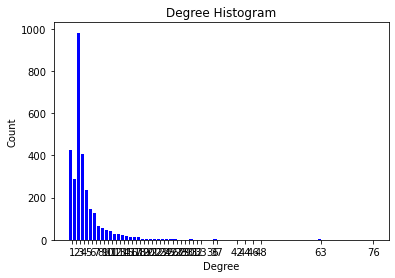

In [30]:
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 42, 44, 46, 48, 63, 76)
(427, 290, 982, 407, 238, 148, 127, 64, 54, 47, 42, 27, 28, 24, 18, 12, 13, 12, 5, 4, 6, 2, 6, 3, 5, 2, 2, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1)


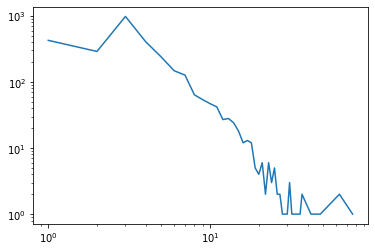

In [31]:
deg = deg[::-1]
cnt = cnt[::-1]
print(deg)
print(cnt)
plt.loglog(deg, cnt)

By the network statistics, my graph has number of nodes: 7250,
number of edges: 7984
Average degree:  2.2025, diameter 49 and density 0.003. 

(source data = id column, target data = reference column)
By the histogram, our dataset has the nodes with degree = 1 at most. Though I selected papers with 10-20 references as source data, but there is not many records for the target data. So, for most paper selected, the cited paper for our source data is only count once or twice. This happens because the sample size of my data is small, which cannot include all records for a certain paper in target data.This can explain why the density is low, since most nodes with degree 1. (D=|E| / |V|(|V|−1))

Since the histogram is sparsed, choose to draw the loglog graph, because it can show other degree's patten other than 1. 
log–log plot is a two-dimensional graph of numerical data that uses logarithmic scales on both the horizontal and vertical axes.
This graph helps show other point's degree. When x axis increases, there is a trend for y axis, number of count, decrease then increase about the point 10^1 on the log-log plot. 


Part 3

In [32]:
# Degree Centrality
# average

sum(list(nx.degree_centrality(G_subgraph).values()))/3013 # 3013 is number of nodes



0.0015342986941492625

This means the nodes are not central, it shows there is not many connections for each nodes.

In [33]:
# sort by degree

dict(sorted(nx.degree_centrality(G_subgraph).items(), key=lambda item: item[1],reverse=True))

{'e2f7a74a-8430-4463-94ce-fe85dfd309f9': 0.025232403718459494,
 '153c5014-dc7a-44a8-a93f-5cd27f1193df': 0.02091633466135458,
 'bff1945c-7b01-4b42-b6c4-1e3601c18a6b': 0.02091633466135458,
 '546cc930-3d5a-4208-a77b-a506f146ab97': 0.01593625498007968,
 'ac20391b-bbff-4926-9c74-08dd0fdac740': 0.015272244355909693,
 'e2e4a385-c6d5-41d0-bf06-b77bd434a468': 0.014608233731739707,
 '4e58a299-e096-494a-8106-a7b0ccfec36f': 0.013944223107569721,
 'f6bd8b64-684d-429a-aab5-8ff3a2c23cd6': 0.012284196547144754,
 'dae15c18-f826-42ba-a0f5-d423f9330f0e': 0.012284196547144754,
 'c1b6b493-01ef-420f-be44-7bacfe34e846': 0.01195219123505976,
 '3ecda3e7-c436-4658-964e-a4cdb03602f9': 0.01095617529880478,
 '3715c870-6569-4d20-8797-af8569e5fde5': 0.010624169986719787,
 '051956bb-f64b-4fdb-87f8-3e2868b8b5d8': 0.010292164674634794,
 'b944f77f-113b-4a02-ae5e-d4a124b8fd5b': 0.010292164674634794,
 'dd83785a-dd19-41e3-9b25-ebabbd48d336': 0.010292164674634794,
 'c93eac1a-7d9a-48ab-9fb4-389c85bea00e': 0.0099601593625498,

In [37]:
# closeness centrality
# Closeness centrality scores each node based on their ‘closeness’ to all other nodes in the network.
# find individual who works quickly

sum(list(nx.closeness_centrality(G_subgraph).values()))/3013 # 3013 is number of nodes

0.1376800542442456

In [38]:
# by sort the model, we can find which one works quick.

dict(sorted(nx.closeness_centrality(G_subgraph).items(), key=lambda item: item[1],reverse=True))

{'e2f7a74a-8430-4463-94ce-fe85dfd309f9': 0.2100418410041841,
 '53384478-6f92-4fd6-8129-d3e150c346ae': 0.20212052073547174,
 'bff1945c-7b01-4b42-b6c4-1e3601c18a6b': 0.20198497854077252,
 '153c5014-dc7a-44a8-a93f-5cd27f1193df': 0.20088035214085634,
 '39d8c152-803c-4ef5-b608-dab128f5bf28': 0.19634941329856584,
 '3715c870-6569-4d20-8797-af8569e5fde5': 0.19522945294270158,
 '4e58a299-e096-494a-8106-a7b0ccfec36f': 0.19448569768192678,
 '493f502b-b1b8-412c-95fd-3c1103480f1d': 0.19417225373904073,
 '051956bb-f64b-4fdb-87f8-3e2868b8b5d8': 0.1937475878039367,
 'e2e4a385-c6d5-41d0-bf06-b77bd434a468': 0.19341167405124254,
 '85ec6417-44b1-4f24-ae00-4ed5df130ca7': 0.19336200808884893,
 '53718c16-5098-4035-8d7d-ce8f98c837a3': 0.19327515400410678,
 '71454da9-6bc0-414c-a426-1ac93e3adb3c': 0.19241088539670373,
 '21a6dd80-cb36-4028-8241-4f44e9ff8192': 0.19241088539670373,
 'c335254c-f545-44b3-a859-05fa29cb97e4': 0.19190825103536158,
 'f6bd8b64-684d-429a-aab5-8ff3a2c23cd6': 0.19140823589222167,
 '4684a03e

These nodes works quick

In [39]:
# Betweeness cetrality
# betweeness is the degree the node lies on the shortest path between two other nodes

# we can find which node influence the system in the network.


sum(list(nx.betweenness_centrality(G_subgraph).values()))/3013 # 3013 is number of nodes

0.0021887877375748595

In [40]:
dict(sorted(nx.betweenness_centrality(G_subgraph).items(), key=lambda item: item[1],reverse=True))

{'e2f7a74a-8430-4463-94ce-fe85dfd309f9': 0.11813212658823272,
 'f56a7285-16cb-4a8e-8d89-e7ae9247e9b0': 0.09183044307852527,
 'f6bd8b64-684d-429a-aab5-8ff3a2c23cd6': 0.07662629453209971,
 '82e05028-b3df-492a-9909-e4ea7b5a3e8a': 0.07049115913435026,
 'bff1945c-7b01-4b42-b6c4-1e3601c18a6b': 0.06731784383732432,
 'b1f3a817-4f46-4e8c-95db-dae23d9a0f5b': 0.06666528300183223,
 '153c5014-dc7a-44a8-a93f-5cd27f1193df': 0.05677044118714194,
 'f56b877b-4060-4754-b303-e8140968544c': 0.05326227640187662,
 '53384478-6f92-4fd6-8129-d3e150c346ae': 0.04979795393816926,
 '5fafdd54-8868-4fc8-b0a8-083993fc222a': 0.04578795378604042,
 '8026f56a-a93e-4933-8ead-c9aa9e3f0498': 0.04492265439401193,
 '3715c870-6569-4d20-8797-af8569e5fde5': 0.04483025060489819,
 'cea6ac36-2cf8-49b5-b738-d6a03b16ed06': 0.043996374225193785,
 'c1b6b493-01ef-420f-be44-7bacfe34e846': 0.04309666040293553,
 '493f502b-b1b8-412c-95fd-3c1103480f1d': 0.04162170914540559,
 'ac20391b-bbff-4926-9c74-08dd0fdac740': 0.03970683304414232,
 'b944f

These nodes influence the system a lot.

Question 4

In [41]:

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import scipy.sparse as sp
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
import pickle
from gae.preprocessing import mask_test_edges

In [42]:
np.random.seed(0) # make sure train-test split is consistent between notebooks
adj_sparse = nx.to_scipy_sparse_matrix(G_subgraph)

# Perform train-test split
adj_train, train_edges, train_edges_false, val_edges, val_edges_false, \
    test_edges, test_edges_false = mask_test_edges(adj_sparse, test_frac=.3, val_frac=.1)
g_train = nx.from_scipy_sparse_matrix(adj_train) # new graph object with only non-hidden edges

In [43]:

# Inspect train/test split
print ("Total nodes:", adj_sparse.shape[0])
print ("Total edges:", int(adj_sparse.nnz/2)) # adj is symmetric, so nnz (num non-zero) = 2*num_edges
print ("Training edges (positive):", len(train_edges))
print ("Training edges (negative):", len(train_edges_false))
print ("Validation edges (positive):", len(val_edges))
print ("Validation edges (negative):", len(val_edges_false))
print ("Test edges (positive):", len(test_edges))
print ("Test edges (negative):", len(test_edges_false))

Total nodes: 3013
Total edges: 6962
Training edges (positive): 4178
Training edges (negative): 4178
Validation edges (positive): 696
Validation edges (negative): 696
Test edges (positive): 2088
Test edges (negative): 2088


In [44]:
def get_roc_score(edges_pos, edges_neg, score_matrix):
    # Store positive edge predictions, actual values
    preds_pos = []
    pos = []
    for edge in edges_pos:
        preds_pos.append(score_matrix[edge[0], edge[1]]) # predicted score
        pos.append(adj_sparse[edge[0], edge[1]]) # actual value (1 for positive)
        
    # Store negative edge predictions, actual values
    preds_neg = []
    neg = []
    for edge in edges_neg:
        preds_neg.append(score_matrix[edge[0], edge[1]]) # predicted score
        neg.append(adj_sparse[edge[0], edge[1]]) # actual value (0 for negative)
        
    # Calculate scores
    preds_all = np.hstack([preds_pos, preds_neg])
    labels_all = np.hstack([np.ones(len(preds_pos)), np.zeros(len(preds_neg))])
    roc_score = roc_auc_score(labels_all, preds_all)
    ap_score = average_precision_score(labels_all, preds_all)
    return roc_score, ap_score

# Adamic-Adar

In [45]:
nx.adamic_adar_index(g_train)

<generator object _apply_prediction.<locals>.<genexpr> at 0x00000130383E74C8>

In [46]:
# Compute Adamic-Adar indexes from g_train
aa_matrix = np.zeros(adj_train.shape)
for u, v, p in nx.adamic_adar_index(g_train): # (u, v) = node indices, p = Adamic-Adar index
    aa_matrix[u][v] = p
    aa_matrix[v][u] = p # make sure it's symmetric
    
# Normalize array
aa_matrix = aa_matrix / aa_matrix.max()

In [47]:

# Calculate ROC AUC and Average Precision
aa_roc, aa_ap = get_roc_score(test_edges, test_edges_false, aa_matrix)

print ('Adamic-Adar Test ROC score: ', str(aa_roc))
print ('Adamic-Adar Test AP score: ', str(aa_ap))

Adamic-Adar Test ROC score:  0.5062364900324423
Adamic-Adar Test AP score:  0.5064578312217645


# Jaccard Coefficient

In [50]:
# Compute Jaccard Coefficients from g_train
jc_matrix = np.zeros(adj_train.shape)
for u, v, p in nx.jaccard_coefficient(g_train): # (u, v) = node indices, p = Jaccard coefficient
    jc_matrix[u][v] = p
    jc_matrix[v][u] = p # make sure it's symmetric
    
# Normalize array
jc_matrix = jc_matrix / jc_matrix.max()

In [52]:
# Calculate ROC AUC and Average Precision
jc_roc, jc_ap = get_roc_score(test_edges, test_edges_false, jc_matrix)

print ('Jaccard Coefficient Test ROC score: ', str(jc_roc))
print ('Jaccard Coefficient Test AP score: ', str(jc_ap))

Jaccard Coefficient Test ROC score:  0.5062241039840871
Jaccard Coefficient Test AP score:  0.5050033734913704


# Preferential Attachment

In [53]:

# Calculate, store Adamic-Index scores in array
pa_matrix = np.zeros(adj_train.shape)
for u, v, p in nx.preferential_attachment(g_train): # (u, v) = node indices, p = Jaccard coefficient
    pa_matrix[u][v] = p
    pa_matrix[v][u] = p # make sure it's symmetric
    
# Normalize array
pa_matrix = pa_matrix / pa_matrix.max()

In [54]:
# Calculate ROC AUC and Average Precision
pa_roc, pa_ap = get_roc_score(test_edges, test_edges_false, pa_matrix)

print ('Preferential Attachment Test ROC score: ', str(pa_roc))
print ('Preferential Attachment Test AP score: ', str(pa_ap))

Preferential Attachment Test ROC score:  0.7000556684062184
Preferential Attachment Test AP score:  0.7136364928786106
